In [1]:
import tp3
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv('../data/synthData.csv',usecols=['X', 'feature_1', 'feature_2', 'feature_3'])


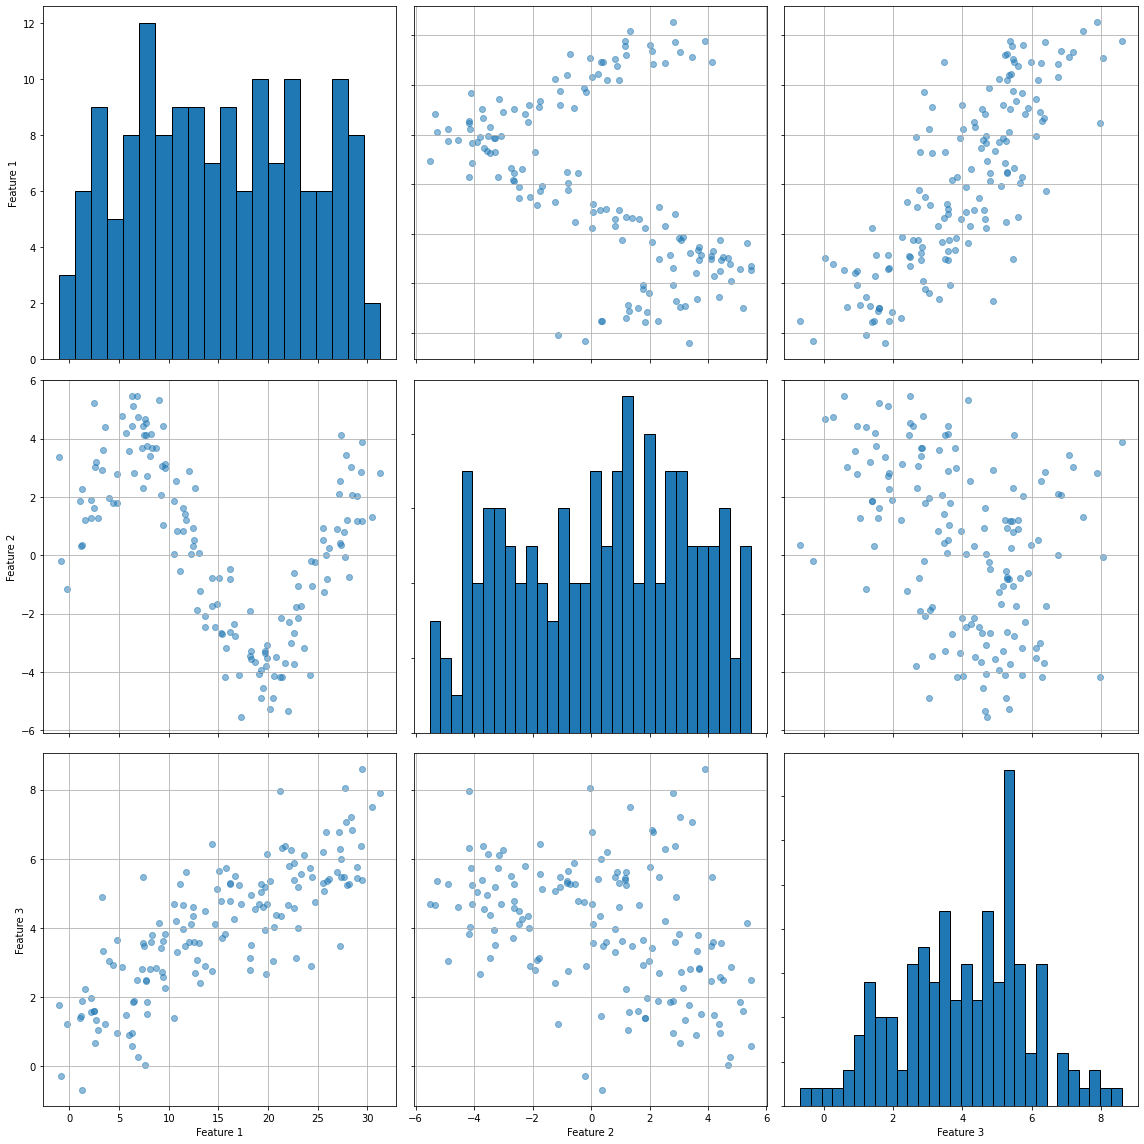

In [3]:
f1 = data['feature_1']
f2 = data['feature_2']
f3 = data['feature_3']

figure, axis = plt.subplots(3, 3, figsize=(16, 16))

axis[0, 0].hist(f1, 20, edgecolor='k')
axis[0, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 0].set_ylabel('Feature 1')

axis[0, 1].scatter(f2, f1, alpha=0.5)
axis[0, 1].grid(True)
axis[0, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 1].tick_params(axis='y', which='both', labelleft=False)

axis[0, 2].scatter(f3, f1, alpha=0.5)
axis[0, 2].grid(True)
axis[0, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 2].tick_params(axis='y', which='both', labelleft=False)

#
axis[1, 0].scatter(f1, f2, alpha=0.5)
axis[1, 0].grid(True)
axis[1, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 0].set_ylabel('Feature 2')

axis[1, 1].hist(f2, 30, edgecolor='k')
axis[1, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 1].tick_params(axis='y', which='both', labelleft=False)

axis[1, 2].scatter(f3, f2, alpha=0.5)
axis[1, 2].grid(True)
axis[1, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 2].tick_params(axis='y', which='both', labelleft=False)

#
axis[2, 0].scatter(f1, f3, alpha=0.5)
axis[2, 0].grid(True)
axis[2, 0].set_xlabel('Feature 1')
axis[2, 0].set_ylabel('Feature 3')

axis[2, 1].scatter(f2, f3, alpha=0.5)
axis[2, 1].grid(True)
axis[2, 1].tick_params(axis='y', which='both', labelleft=False)
axis[2, 1].set_xlabel('Feature 2')

axis[2, 2].hist(f3, 30, edgecolor='k')
axis[2, 2].tick_params(axis='y', which='both', labelleft=False)
axis[2, 2].set_xlabel('Feature 3')

plt.tight_layout()
plt.show()

In [4]:
x = data[['feature_2', 'feature_3']].to_numpy()
y = data['feature_1'].to_numpy()
estimates = tp3.loess(x, y, 0.4, fit=2, dist=2)

residuals = y - estimates

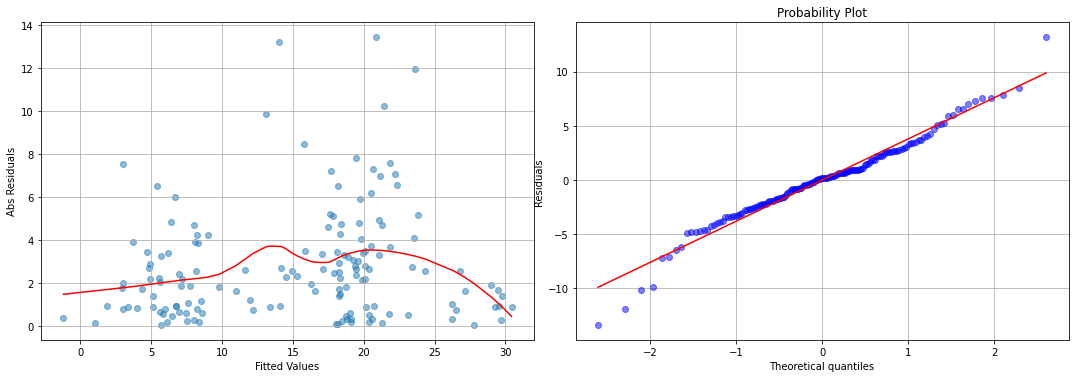

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
plt.tight_layout()
res = stats.probplot(residuals, plot=plt, fit=True)

axs[1].get_lines()[0].set_marker('o')
axs[1].get_lines()[0].set_alpha(0.5)
axs[1].set_ylabel('Residuals')
axs[1].grid(True)

abs_res= np.abs(residuals)
abs_res_est = tp3.loess(estimates.reshape((len(estimates),1)), abs_res, f=0.67, fit=2, dist=2, normalize=False)

order_estimates = np.argsort(estimates)

axs[0].scatter(estimates, abs_res, alpha=0.5)
axs[0].plot(estimates[order_estimates], abs_res_est[order_estimates], color='red')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Abs Residuals')
axs[0].grid(True)

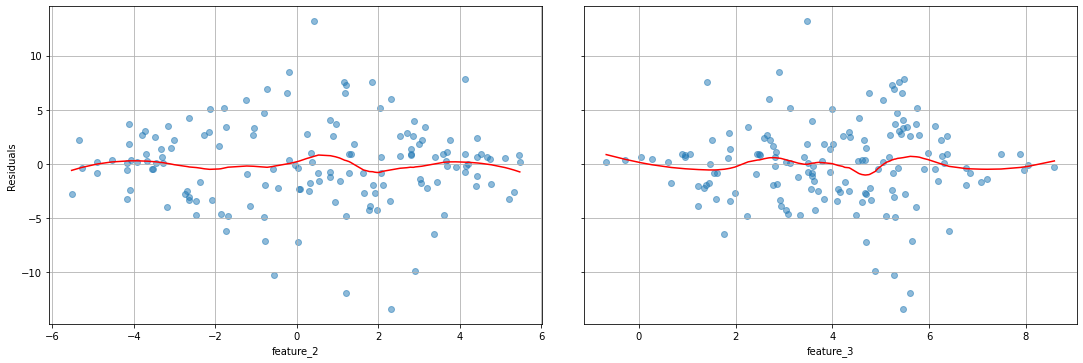

In [6]:
cols = ['feature_2','feature_3']

fig, axs = plt.subplots(1, len(cols), figsize=(15,5))
plt.tight_layout()
axs[0].set_ylabel('Residuals')
axs[1].tick_params(axis='y', which='both', labelleft=False)

for i in range(len(cols)):
    x = data[[cols[i]]].to_numpy()
    res_est = tp3.loess(x, residuals, f=0.4, fit=2, dist=2, normalize=False)
    order = np.argsort(x.T[0])

    axs[i].scatter(x, residuals, alpha=0.5)
    axs[i].plot(x[order], res_est[order], color='red')
    axs[i].set_xlabel(cols[i])
    axs[i].grid(True)